In [142]:
if isunix
    addpath('~/internal_2tb/Dropbox/0_CODE/MATLAB/saveSameSize');
    addpath(['~/internal_2tb/Dropbox/0_CODE/trex_fish/Triplet_processing_toolbox'])
else
    addpath('F:\Dropbox\0_CODE\MATLAB\saveSameSize');
    addpath('F:\Dropbox\0_CODE\trex_fish\Triplet_processing_toolbox')
end

base_data_path='~/internal_2tb/trex/figs_results/';
base_save_path='~/internal_2tb/trex/figs_results/';
data_path='subset_beamform_cardioid_coherent_run131';
ping_num = 500;
plot_show_opt=1;

% Set up various paths
ss = strsplit(data_path,'_');
run_num = str2double(ss{end}(4:end));

[~,script_name,~] = fileparts(mfilename('fullpath'));
script_name = script_name(1:end-4);
save_path = fullfile(base_save_path,sprintf('%s_run%03d',script_name,run_num));
if ~exist(save_path,'dir')
    mkdir(save_path);
end

% Ping range
if isempty(ping_num)
    data_files = dir(fullfile(base_data_path,data_path,'*.mat'));
    ping_len = length(data_files);
else
    ping_len = length(ping_num);
end

% Set params
cmap = 'jet';
sm_len = 200;
axis_lim = [-4 -2 -4 -2];
color_axis = [180 210];
norm_param.sm_len = sm_len;    % smooth length
norm_param.aux_m = 200;        % length of auxiliary band in [m]
norm_param.guard_num_bw = 2;   % 2/BW


In [143]:
ping_len


ping_len =

     1



In [144]:
iP=1
% Load file and set filename
    if isempty(ping_num)  % if processing all files in the folder
        fname = data_files(iP).name;
        ping_num_curr = str2double(fname(end-7:end-4));
    else
        fname = sprintf('%s_ping%04d.mat',...
                        data_path,ping_num(iP));
        ping_num_curr = ping_num(iP);
    end
    disp(['Processing ',fname])
    A = load(fullfile(base_data_path,data_path,fname));

    save_fname = sprintf('%s_run%03d_ping%04d',script_name,run_num,ping_num_curr);

    % Get normalizer output
    [beamform_norm,meta] = normalizer_split_window(A,norm_param);

    % Plotting
    title_text = sprintf('Run %d, Ping %d, %02d:%02d:%02d',...
                         run_num,ping_num_curr,A.data.time_hh_local,...
                         A.data.time_mm_local,A.data.time_ss_local);



iP =

     1

Processing subset_beamform_cardioid_coherent_run131_ping0500.mat


In [145]:
title_text


title_text =

Run 131, Ping 500, 01:14:14



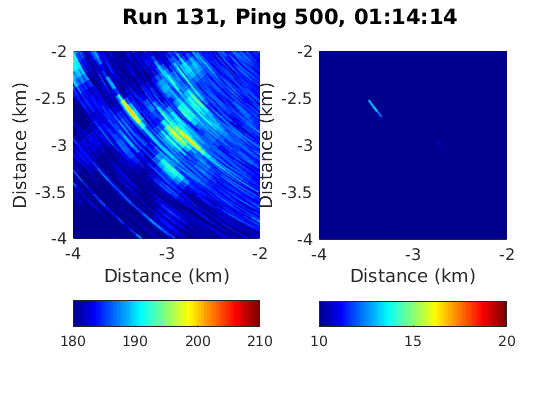

In [146]:
% Set up figure
fig = figure('position',[280 60 1000 500]);
corder = get(gca,'colororder');
if ~plot_show_opt  % if not showing figure
set(fig,'visible','off');
end

figure(fig)
h_ori = plot_small_echogram(subplot(121),A,sm_len,color_axis,axis_lim);

subplot(122)
cla
h_norm = pcolor(meta.X/1e3,meta.Y/1e3,10*log10(beamform_norm));
hold on
set(h_norm,'edgecolor','none');
axis equal
colormap(jet)
colorbar('location','southoutside');
caxis([10,20])
axis(axis_lim)
xlabel('Distance (km)','fontsize',14)
ylabel('Distance (km)','fontsize',14)
set(gca,'fontsize',12)

mtit(title_text,'fontsize',16);
saveSameSize_150(gcf,'file',fullfile(save_path,[save_fname,'.png']),...
    'format','png');

In [84]:
[max(max(10*log10(beamform_norm))), min(min(10*log10(beamform_norm(~isinf(10*log10(beamform_norm))))))]


ans =

   26.3218  -22.9546



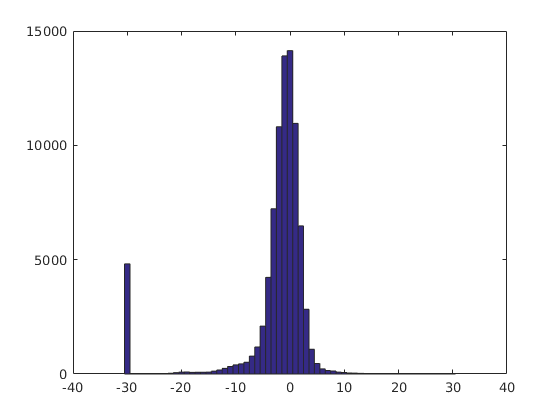

In [61]:
hist(10*log10(beamform_norm(:)),-30:1:30)

In [159]:
base_data_path='~/internal_2tb/trex/figs_results/';
base_save_path='~/internal_2tb/trex/figs_results/';
data_path='subset_beamform_cardioid_coherent_run087';
plot_show_opt=1;

% Set params
cmap = 'jet';
sm_len = 300;
axis_lim = [-4 -2 -4 -2];
norm_caxis = [10 15];
norm_param.sm_len = sm_len;    % smooth length
norm_param.aux_m = 200;        % length of auxiliary band in [m]
norm_param.guard_num_bw = 2;   % 2/BW

Processing subset_beamform_cardioid_coherent_run087_ping0100.mat


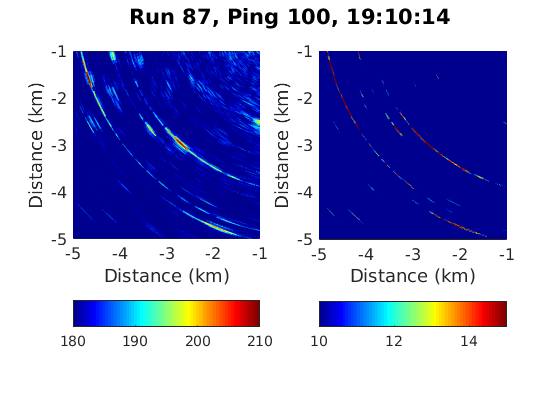

In [160]:
plot_normalizer_split_window_output(data_path,100,base_save_path,base_data_path,plot_show_opt,norm_caxis) 

Processing subset_beamform_cardioid_coherent_run087_ping0300.mat


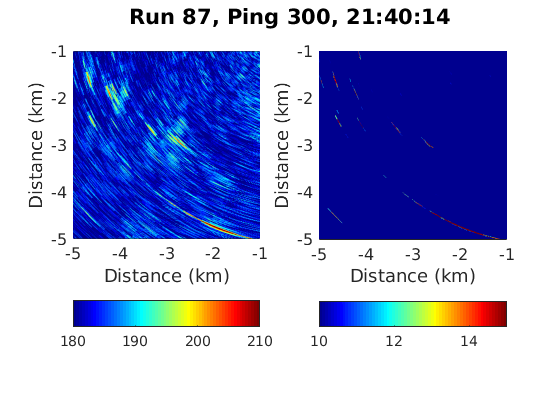

In [161]:
plot_normalizer_split_window_output(data_path,300,base_save_path,base_data_path,plot_show_opt,norm_caxis) 

Processing subset_beamform_cardioid_coherent_run087_ping0502.mat


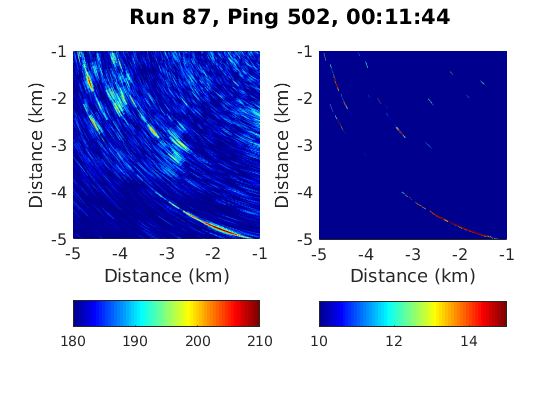

In [162]:
plot_normalizer_split_window_output(data_path,502,base_save_path,base_data_path,plot_show_opt,norm_caxis) 

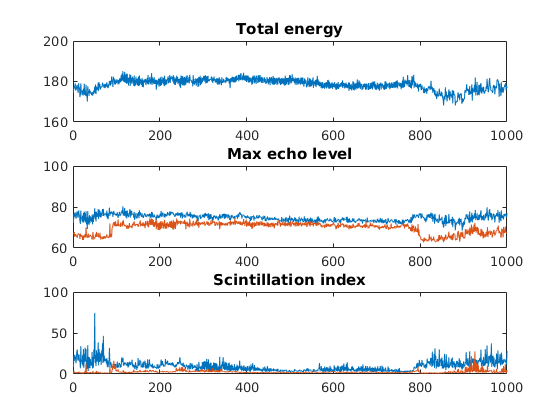

In [3]:
plot_total_energy_fcn(131,1:1:1000)

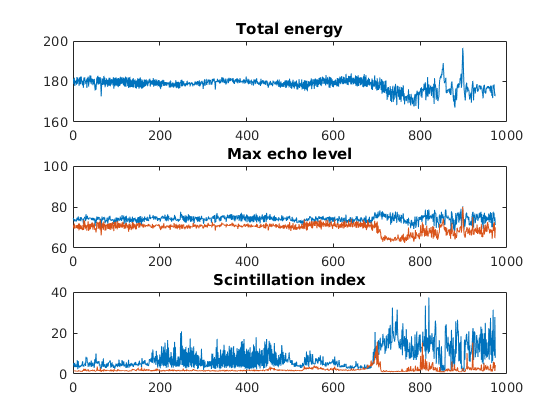

In [4]:
plot_total_energy_fcn(124,1:1:973)

In [2]:
plot_total_energy

Processing echo_info_run103_ping0003.mat


Error using load
Unable to read file '/home/wu-jung/internal_2tb/trex/figs_results/echo_info_run103/echo_info_run103_ping0003.mat'. No such file or directory.

Error in plot_total_energy (line 44)
    S = load(fullfile(base_data_path,data_path,scat_fname));

